In [1]:
from top2vec import Top2Vec

/home/hatma/anaconda3/envs/top2vec/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from dask import dataframe as dd
import pandas as pd
import json
from gensim.parsing.preprocessing import remove_stopwords, STOPWORDS

filetype = "json"
inputfile = "mixed.json"
verbose = True

if filetype == "csv":
    # tmp = pd.read_csv(inputfile, header=None, low_memory=False)
    tmp = dd.read_csv(inputfile, sep=';', header=None)
    tmp2 = tmp.to_dask_array(lengths=True)
    tmp3 = tmp2.compute()
    tmp4 = pd.DataFrame(tmp3)

    if verbose == True:
        print("\n\n csv file (before preprocessing) = ")
        print(tmp4)

    corpus = tmp4[0].str.lower().apply(remove_stopwords).to_numpy()

elif filetype == "json":
    with open(inputfile) as json_file:
        jsonfile = json.load(json_file)

    tmp = pd.DataFrame(jsonfile['results'])

    if verbose == True:
        print("\n\n json file (before preprocessing) = ")
        print(tmp)

    tmp['td'] = tmp['t'] + ' ' + tmp['d']
    corpus = tmp['td'].str.lower().apply(remove_stopwords).to_numpy()

else:
    print("ERROR, only accept csv or json file!")




 json file (before preprocessing) = 
                                                     t  \
0                             Movie Coverage - YouTube   
1       Marvel Studios Celebrates The Movies - YouTube   
2                       FRESH Movie Trailers - YouTube   
3                           Movie: The Movie - YouTube   
4    Tippu Hindi Dubbed Full Movie | Satya Karthik,...   
..                                                 ...   
193  Amazon Music Unlimited | 70 million songs ad-f...   
194                  Music Ally Is A Knowledge Company   
195                              Music - Rolling Stone   
196  MusicRadar: Music Gear, Equipment, News, Tutor...   
197                Get started | Learning Music (Beta)   

                                                     a  \
0    https://www.youtube.com/channel/UCwYzZs_hwA6Nd...   
1      https://www.youtube.com/watch%3Fv%3DQdpxoFcdORI   
2         https://www.youtube.com/c/FreshMovieTrailers   
3      https://www.youtube.com/w

In [3]:
model = Top2Vec(documents=corpus.tolist() )

2022-08-21 16:19:32,226 - top2vec - INFO - Pre-processing documents for training
2022-08-21 16:19:32,235 - top2vec - INFO - Creating joint document/word embedding


validate documents
198
<class 'list'>


2022-08-21 16:19:32,487 - top2vec - INFO - Creating lower dimension embedding of documents
2022-08-21 16:19:38,459 - top2vec - INFO - Finding dense areas of documents
2022-08-21 16:19:38,464 - top2vec - INFO - Finding topics


In [4]:
model.get_num_topics()

2

In [5]:
topic_sizes, topic_nums = model.get_topic_sizes()

print(topic_sizes)
print(topic_nums)


[104  94]
[0 1]


In [6]:
topic_words, word_scores, topic_nums = model.get_topics(2)

print(topic_words)
print(word_scores)
print(topic_nums)

[['movie' 'coimbatore' 'youtube' 'music' 'movies' 'latest']
 ['youtube' 'music' 'movies' 'coimbatore' 'latest' 'movie']]
[[ 0.03824628  0.03562402  0.02816693  0.00899256 -0.04267611 -0.05574443]
 [ 0.13584134  0.09341661  0.03436821 -0.01854775 -0.06195176 -0.06364278]]
[0 1]


In [7]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["music"], num_topics=2)

print(topic_words)
print(word_scores)
print(topic_scores)
print(topic_nums)

[array(['youtube', 'music', 'movies', 'coimbatore', 'latest', 'movie'],
      dtype='<U10'), array(['movie', 'coimbatore', 'youtube', 'music', 'movies', 'latest'],
      dtype='<U10')]
[array([ 0.13584134,  0.09341661,  0.03436821, -0.01854775, -0.06195176,
       -0.06364278], dtype=float32), array([ 0.03824628,  0.03562402,  0.02816693,  0.00899256, -0.04267611,
       -0.05574443], dtype=float32)]
[0.09341662 0.00899257]
[1 0]


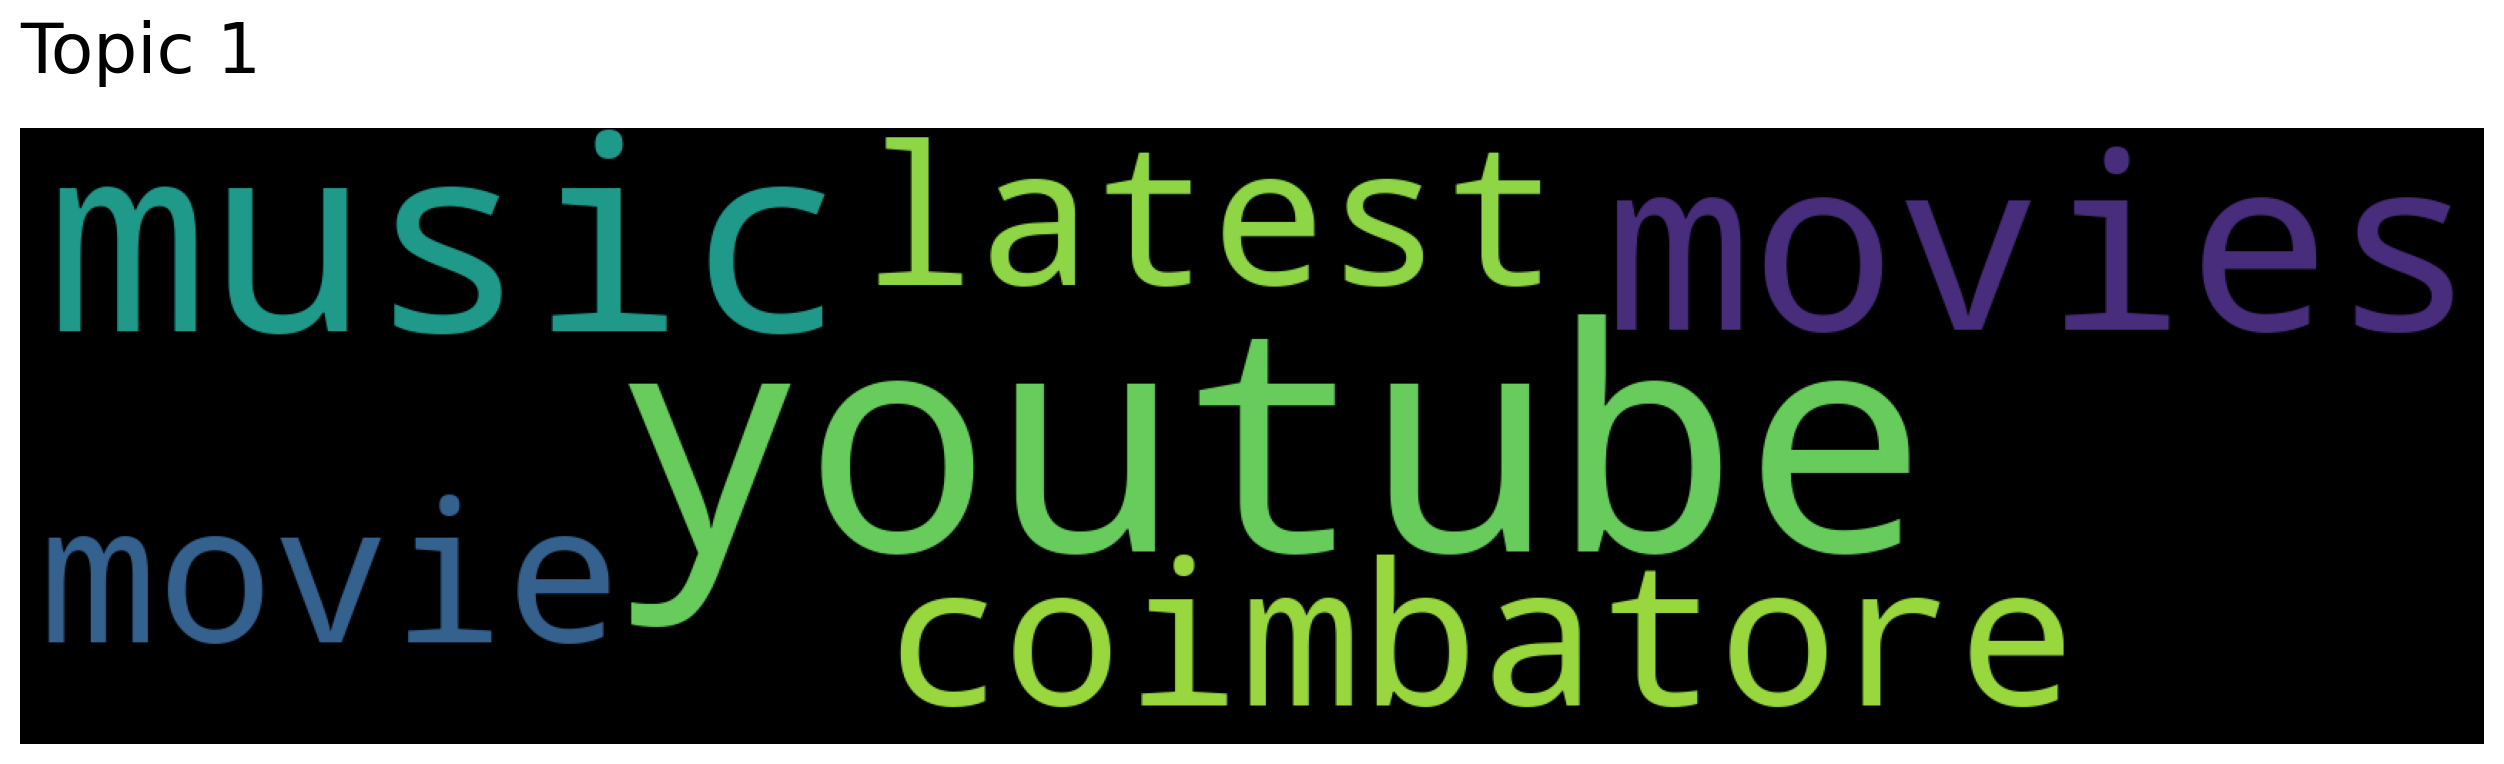

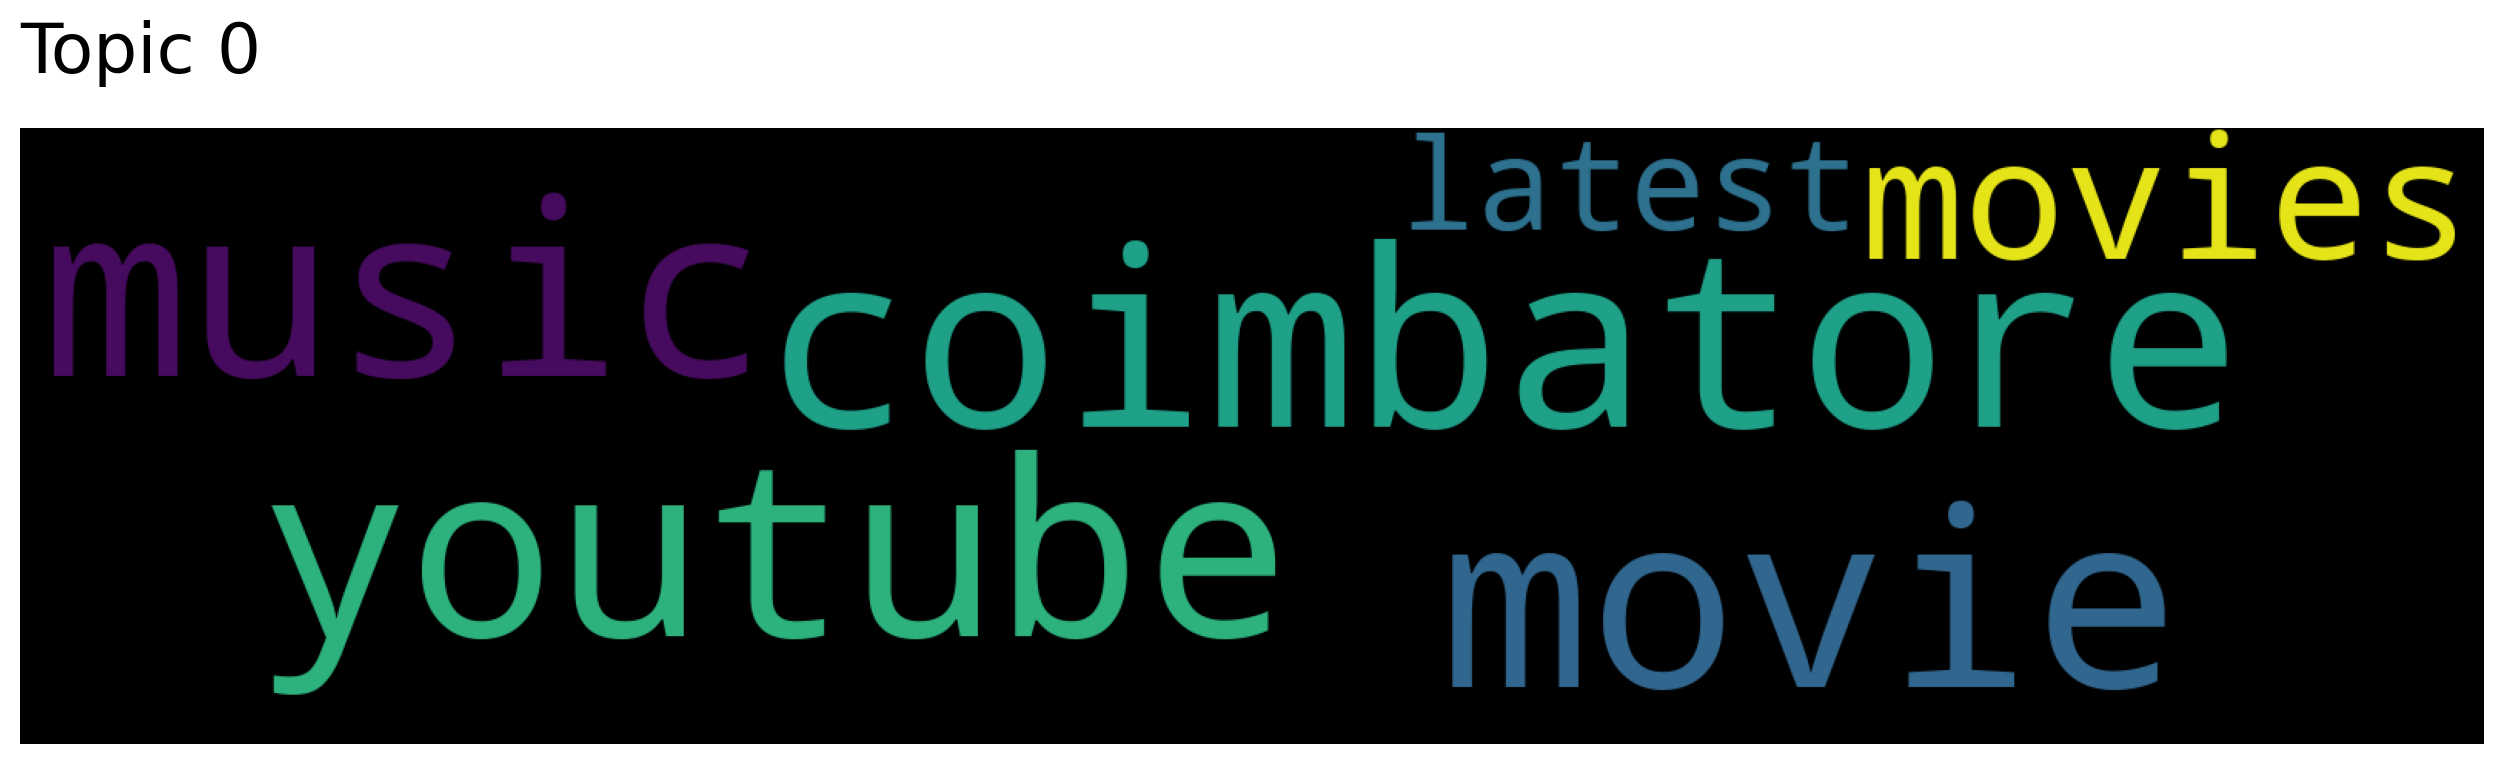

In [8]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["music"], num_topics=2)
for topic in topic_nums:
    model.generate_topic_wordcloud(topic)

In [9]:
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=1, num_docs=2)

print(documents)
print(document_scores)
print(document_ids)

['ek hi maqsad (yodha) hindi dubbed movie | darshan, nikita ... duration: 2:03:17 posted: 20-apr-2021 video'
 'sony music india - youtube sony music india sme- home hits. subscribe channel listen chart-busters making, premieres blockbuster videos d.']
[0.35770807 0.33310652]
[ 43 153]


In [10]:
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=1, num_docs=2)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 43, Score: 0.35770806670188904
-----------
ek hi maqsad (yodha) hindi dubbed movie | darshan, nikita ... duration: 2:03:17 posted: 20-apr-2021 video
-----------

Document: 153, Score: 0.33310651779174805
-----------
sony music india - youtube sony music india sme- home hits. subscribe channel listen chart-busters making, premieres blockbuster videos d.
-----------



In [11]:
documents, document_scores, document_ids = model.search_documents_by_keywords(keywords=["music", "youtube"], num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 3, Score: 0.15831276774406433
-----------
movie: movie - youtube duration: 8:33 posted: 26-feb-2012 video
-----------

Document: 77, Score: 0.13957084715366364
-----------
benedetta trailer (2021) paul verhoeven movie hd - youtube duration: 2:10 posted: 1 day ago video
-----------

Document: 98, Score: 0.13904353976249695
-----------
malayalam movies, movie news, movie reviews, movie news ... manorama online movie section provides movie news malayalam language. movie channel covers hollywood, bollywood, kollywood, tollywood and.
-----------

Document: 78, Score: 0.13101926445960999
-----------
malayalam movies coimbatore | movie timings ... malayalam movies coimbatore : check list showing malayalam movies coimbatore movie showtimes, review, trailer, photos, ...
-----------

Document: 60, Score: 0.12478271871805191
-----------
mark wahlberg movie 'infinite' skips theaters, heads ... - deadline 4 hours ago · infinite recently slated hit cinemas september 24. exhibition need wor

In [12]:
words, word_scores = model.similar_words(keywords=["music"], keywords_neg=[], num_words=20)
for word, score in zip(words, word_scores):
    print(f"{word} {score}")

youtube 0.08134971229183706
movies 0.03314897491612764
latest 0.02630939828348148
coimbatore 0.015836421262896812
movie -0.011825432921721335
